<h1><b>Hashing</b></h1>

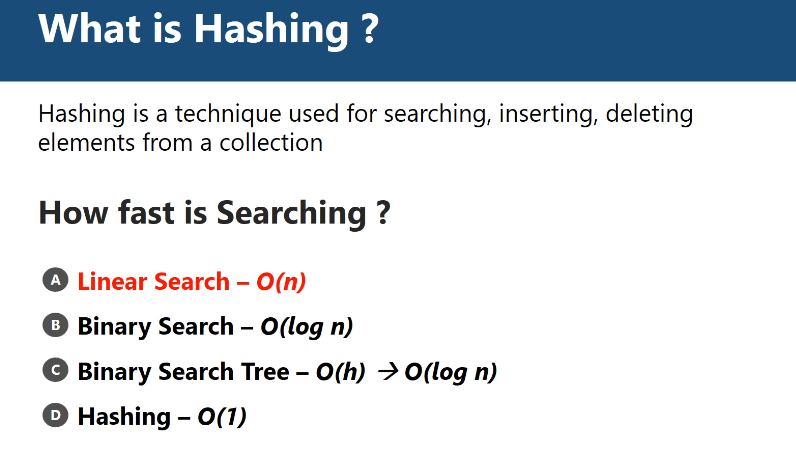

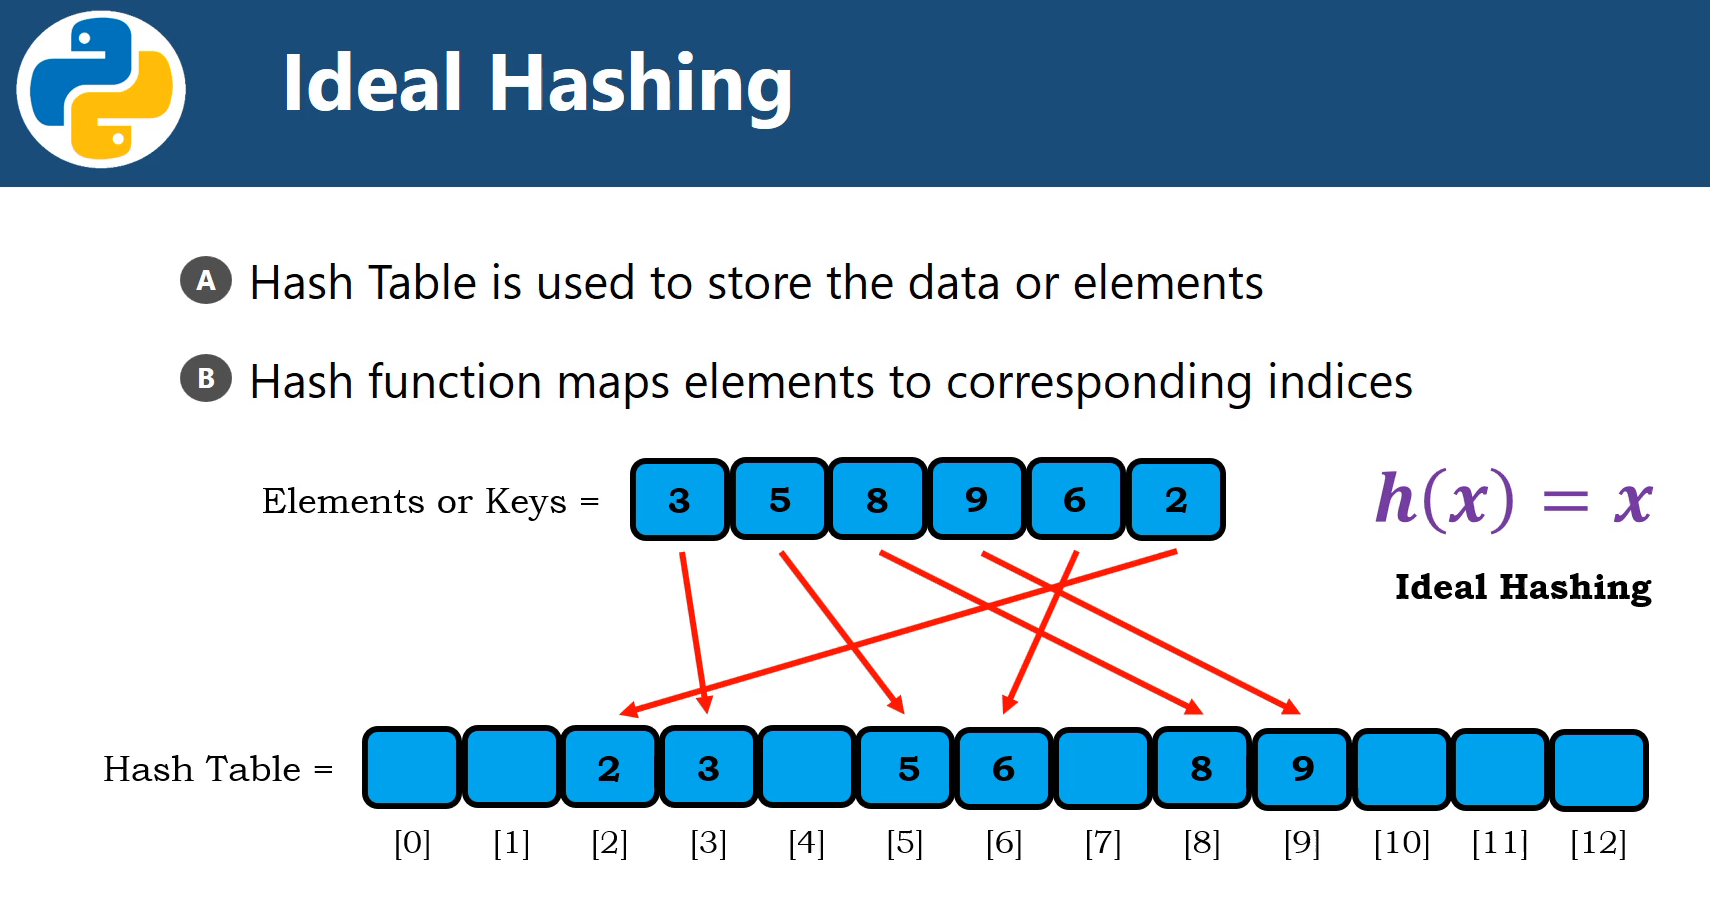

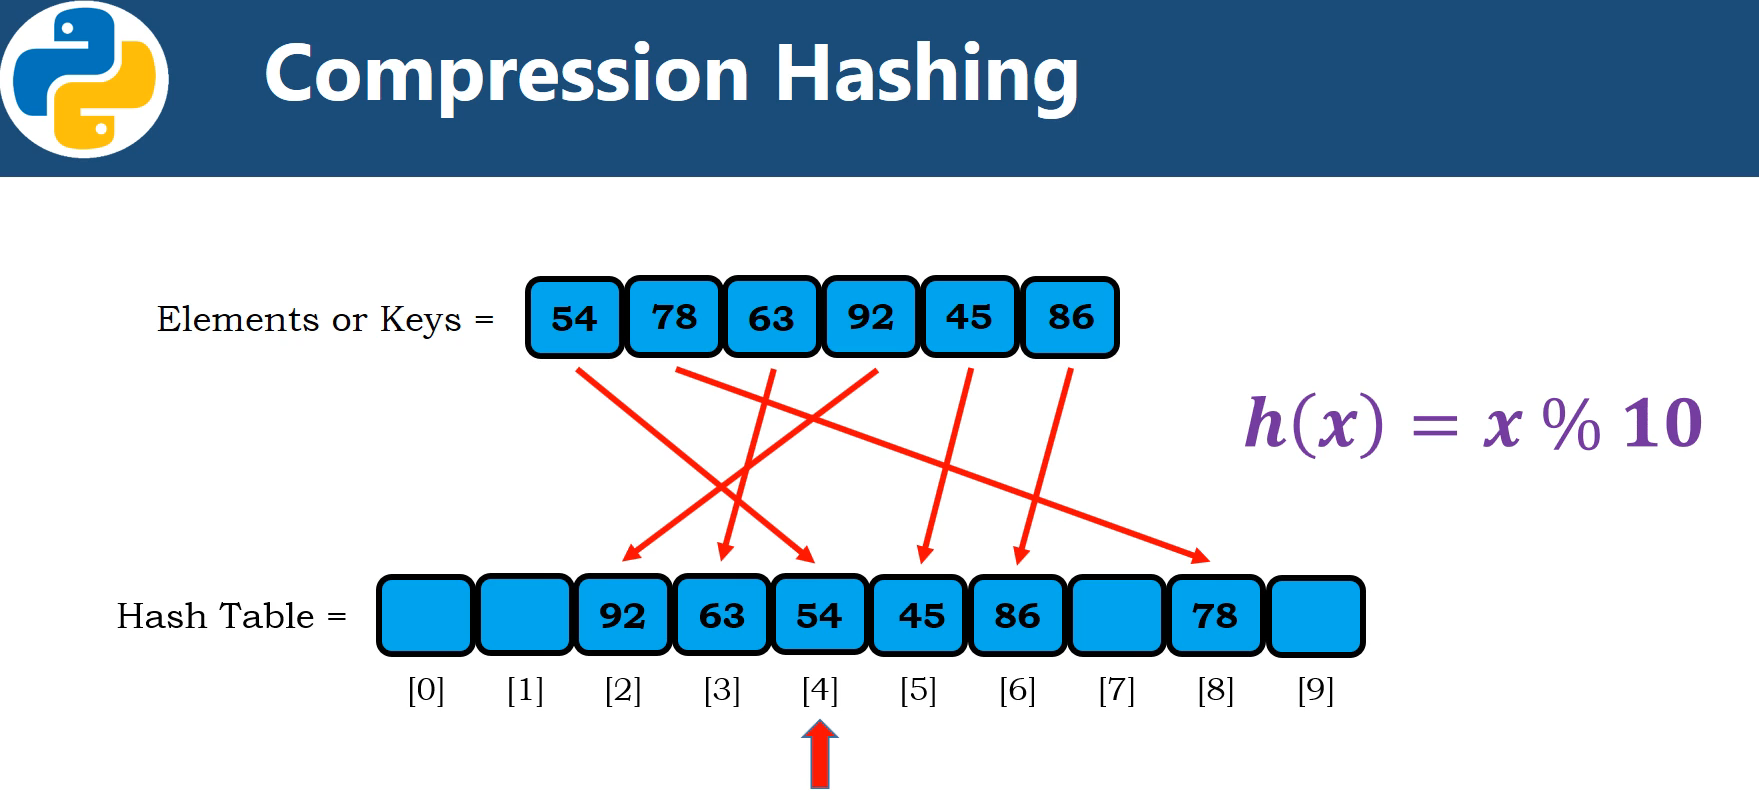

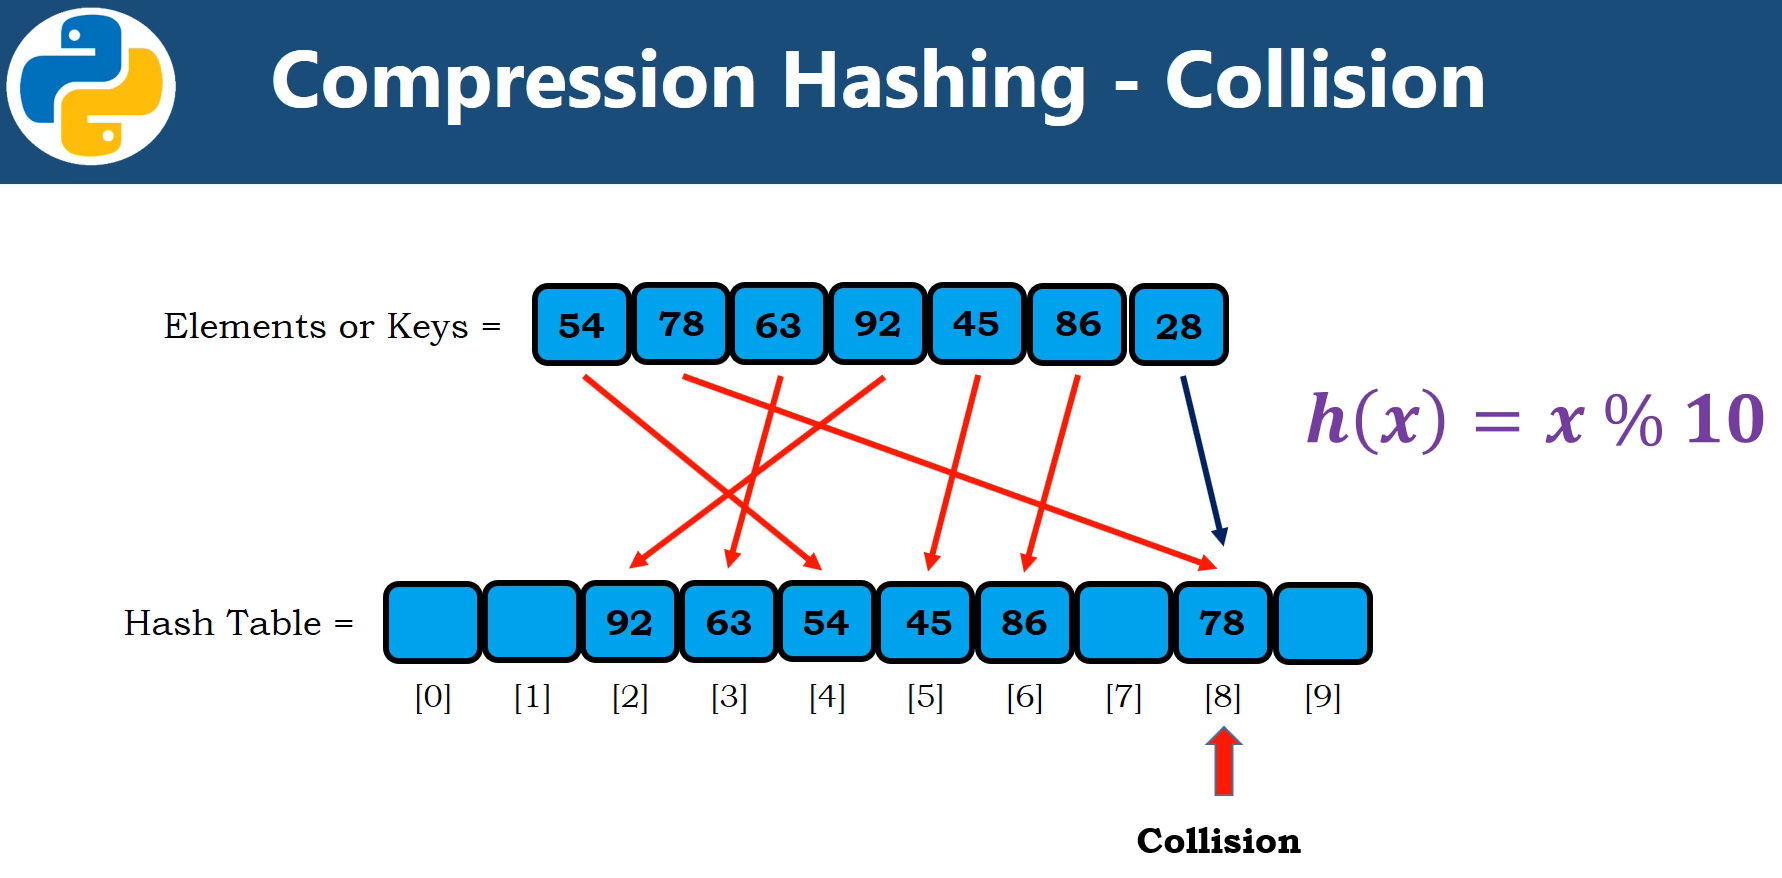

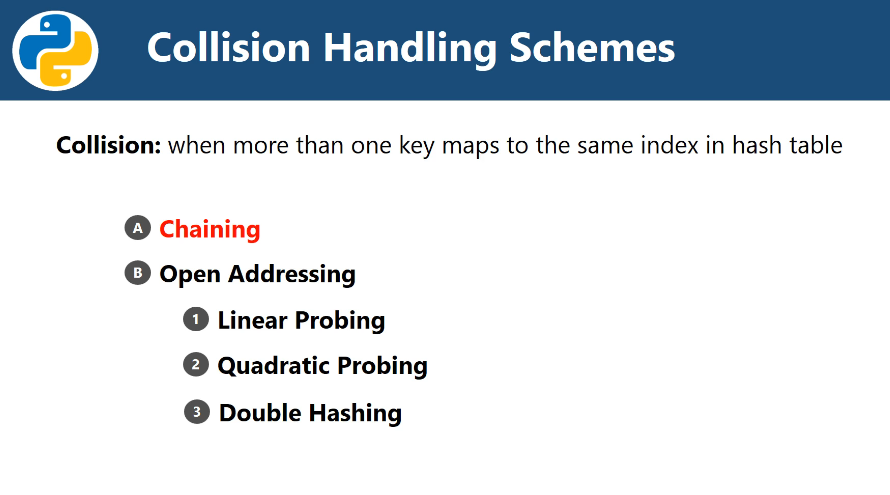

<h2><b>Chaining</b></h2>

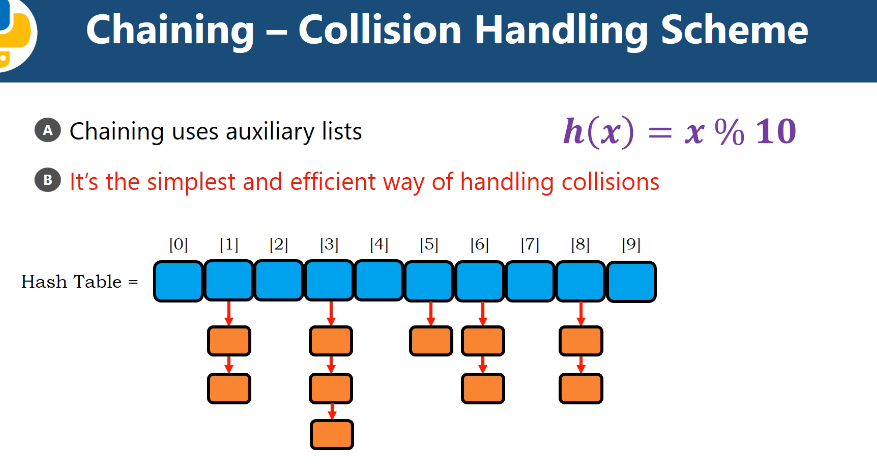

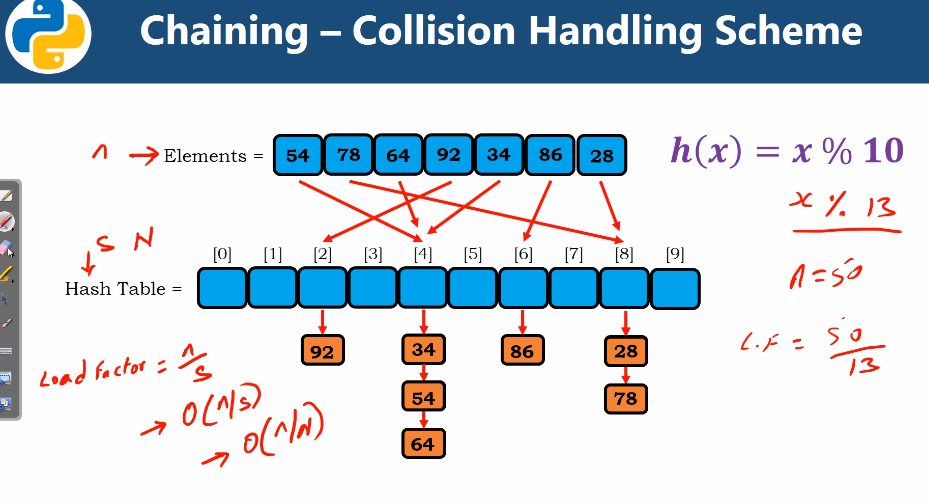

In [1]:
class HashChain:
    def __init__(self, s = 10):
        """Class constructor, default hash function is h(x) = x % 10."""
        self._size = s
        self._hashtable = [[] for _ in range(s)]

    def hashcode(self, key):
        """Returns the hash code of the given key. h(key) = key % self._size. O(1)"""
        return key % self._size

    def insert(self, key):
        """Inserts the given key into the hashtable. O(1)"""
        self._hashtable[self.hashcode(key)].append(key)

    def search(self, key):
        """Returns True if the given key is in the hashtable, False otherwise. On average O(n/s)"""
        i = self.hashcode(key)
        if key in self._hashtable[i]:
            return True
        else:
            return False

    def display(self):
        """Prints the hashtable."""
        print(self._hashtable)

    def clear(self):
        """Makes the hashtable empty."""
        self._hashtable = [[] for _ in range(self._size)]
        

In [2]:
import numpy as np

ht = HashChain(10)

A = np.random.randint(1, 81, 20)
print("Elements:", A)

for i in A:
    ht.insert(i)

print("\nHashtable:")
ht.display()

print()
for i in np.random.randint(40, 70, 10):
    print(f"Is {i} in the hashtable? {ht.search(i)}")

ht.clear()
print("\nEmpty hashtable:")
ht.display()

Elements: [37  6 11 35 16 25 42 20 27 16 47 63 23 27 52 68 24 40 76 53]

Hashtable:
[[20, 40], [11], [42, 52], [63, 23, 53], [24], [35, 25], [6, 16, 16, 76], [37, 27, 47, 27], [68], []]

Is 46 in the hashtable? False
Is 40 in the hashtable? True
Is 56 in the hashtable? False
Is 69 in the hashtable? False
Is 64 in the hashtable? False
Is 62 in the hashtable? False
Is 69 in the hashtable? False
Is 42 in the hashtable? True
Is 45 in the hashtable? False
Is 51 in the hashtable? False

Empty hashtable:
[[], [], [], [], [], [], [], [], [], []]


<h2><b>Linear probing</b></h2>

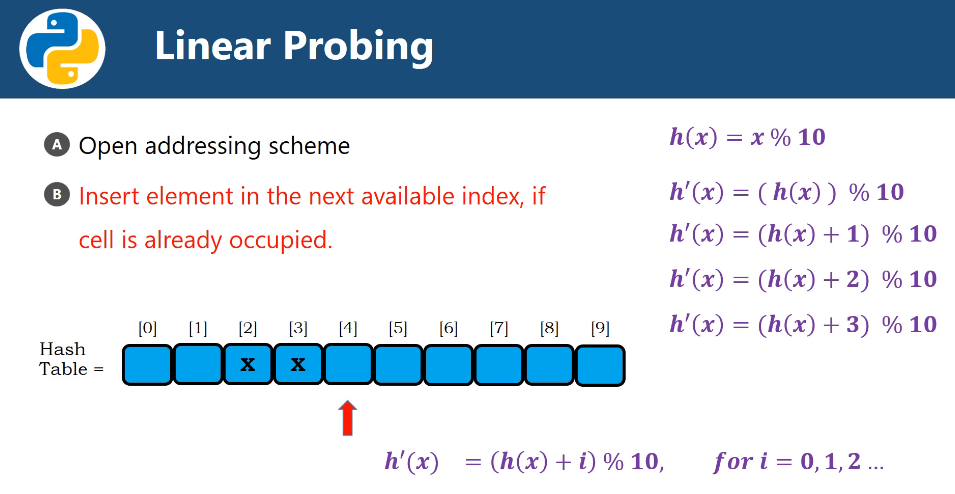

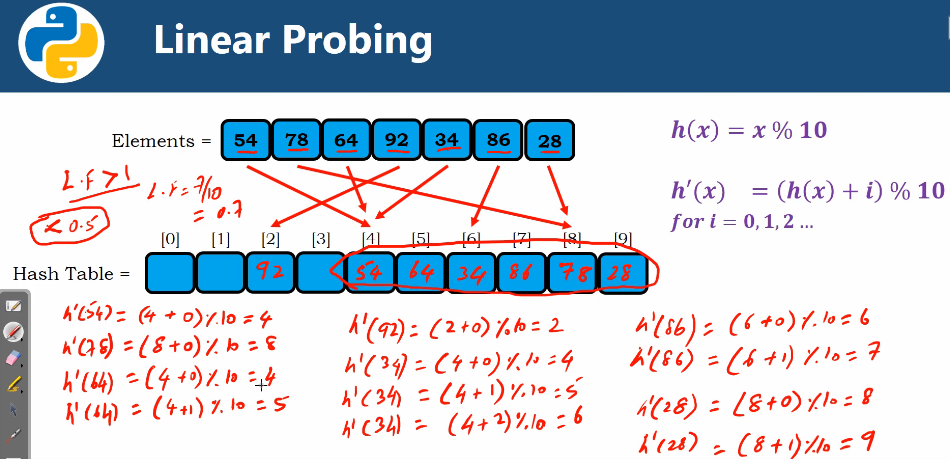

<p style="font-size: 20px;">Load factor of the linear probing is the size of key array divided by the size of hashtable. <br>
It cannot be higher than 1. However it is claimed that the load factor should be lower than <b>0.5</b>, <br>which means that the hashtable should at least two times larger the the key array.</p>

In [3]:
class HashLinearProbe:
    def __init__(self, s = 10):
        self._size = s
        self._hashtable = [None] * s

    def hashcode(self, key):
        return key % self._size

    def lprobe(self, key):
        i = self.hashcode(key)
        j = 1
        while self._hashtable[(i+j) % self._size]:
            j += 1
        return (i+j) % self._size

    def insert(self, key):
        i = self.hashcode(key)
        if self._hashtable[i]:
            i = self.lprobe(key)
        self._hashtable[i] = key

    def search(self, key):
        i = self.hashcode(key)
        j = 0
        while self._hashtable[(i + j) % self._size] != key:
            if not self._hashtable[(i + j) % self._size]:
                return False
            j += 1
        return True

    def display(self):
        print(self._hashtable)

    def clear(self):
        self._hashtable = [None] * self._size
        

In [4]:
hl = HashLinearProbe(20)

A = np.random.randint(1, 41, 9)
print("Keys:", A)

for i in A:
    hl.insert(i)

print("\nHashtable:")
hl.display()

print()
for i in np.random.randint(20, 36, 10):
    print(f"Is {i} in the hashtable? {hl.search(i)}")

hl.clear()
print('\nEmpty hashtable:')
hl.display()

Keys: [38 11  9  1 24 32 22 11 19]

Hashtable:
[None, 1, 22, None, 24, None, None, None, None, 9, None, 11, 32, 11, None, None, None, None, 38, 19]

Is 28 in the hashtable? False
Is 24 in the hashtable? True
Is 29 in the hashtable? False
Is 24 in the hashtable? True
Is 20 in the hashtable? False
Is 32 in the hashtable? True
Is 23 in the hashtable? False
Is 24 in the hashtable? True
Is 26 in the hashtable? False
Is 31 in the hashtable? False

Empty hashtable:
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


<h2><b>Quadratic probing</b></h2>

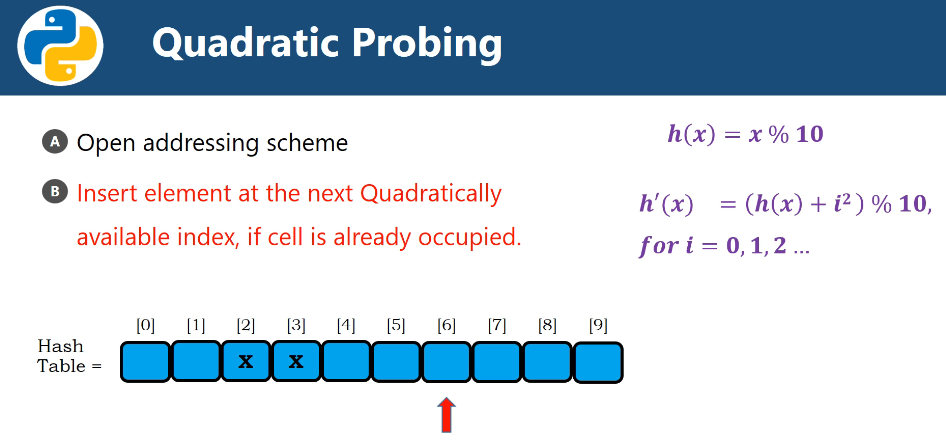

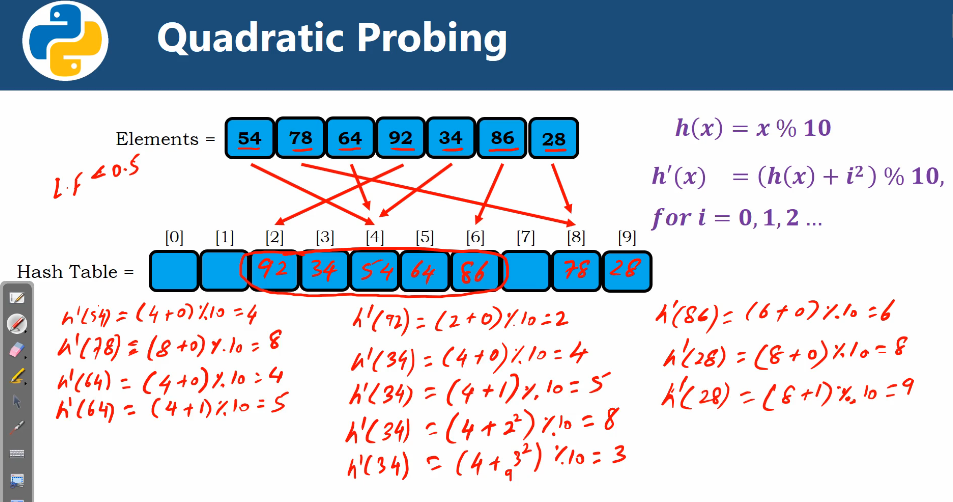

In [5]:
class HashQuadraticProbe:
    __slots__ = '_size', '_hashtable'
    def __init__(self, s = 10):
        self._size = s
        self._hashtable = [None] * s

    def hashcode(self, key):
        return key % self._size

    def qprobe(self, key):
        i = self.hashcode(key)
        j = 1
        while self._hashtable[(i + j**2) % self._size]:
            j += 1
        return (i + j**2) % self._size

    def insert(self, key):
        i = self.hashcode(key)
        if self._hashtable[i]:
            i = self.qprobe(key)
        self._hashtable[i] = key

    def search(self, key):
        i = self.hashcode(key)
        j = 0
        while self._hashtable[(i + j**2) % self._size] != key:
            if not self._hashtable[(i + j**2) % self._size]:
                return False
            j += 1
        return True

    def display(self):
        print(self._hashtable)

    def clear(self):
        self._hashtable = [None] * self._size
        

In [6]:
hq = HashQuadraticProbe(10)

A = np.random.randint(1, 5, 5)
print("Keys:", A)

for i in A:
    hq.insert(i)

print("\nHashtable:")
hq.display()

print()
for i in np.random.randint(1, 6, 3):
    print(f"Is {i} in the hashtable? {hq.search(i)}")

hq.clear()
print('\nEmpty hashtable:')
hq.display()

Keys: [1 4 1 4 1]

Hashtable:
[1, 1, 1, None, 4, 4, None, None, None, None]

Is 3 in the hashtable? False
Is 5 in the hashtable? False
Is 5 in the hashtable? False

Empty hashtable:
[None, None, None, None, None, None, None, None, None, None]


<h2><b>Double Hashing</b></h2>

<p style="font-size: 20px;">It involves computing another hash function if the calculated index has already been taken. <br>
    This technique <b>prevents</b> the elements of hashtable from creating clusters.</p>

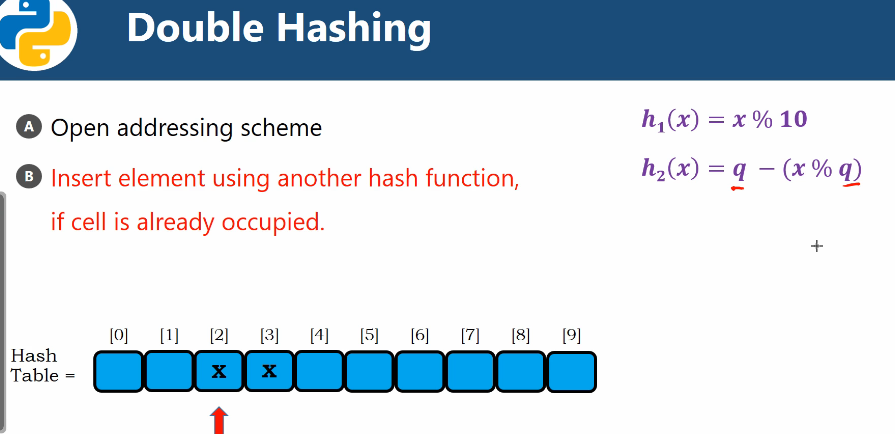

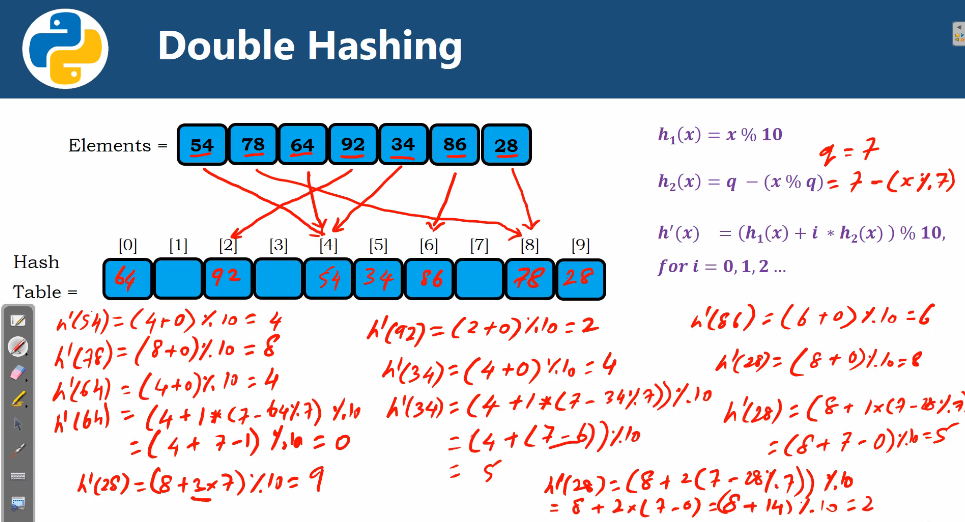

In [7]:
class HashDouble:
    __slots__ = '_size', '_hashtable', '_second_fun'
    def __init__(self, fun, s = 10):
        self._size = s
        self._hashtable = [None] * s
        self._second_fun = fun

    def hashcode(self, key):
        return key % self._size

    def dhash(self, key):
        i = self.hashcode(key)
        d = self._second_fun(key)
        j = 1
        while self._hashtable[(i + j * d) % self._size]:
            j += 1
        return (i + j * d) % self._size

    def insert(self, key):
        i = self.hashcode(key)
        if self._hashtable[i]:
            i = self.dhash(key)
        self._hashtable[i] = key

    def search(self, key):
        i = self.hashcode(key)
        d = self._second_fun(key)
        j = 0
        while self._hashtable[(i + j * d) % self._size] != key:
            if not self._hashtable[(i + j * d) % self._size]:
                return False
            j += 1
        return True

    def clear(self):
        self._hashtable = [None] * self._size

    def display(self):
        print(self._hashtable)


In [8]:
def sec_fun(x):
    return 7 - (x % 7)


hd = HashDouble(sec_fun, 10)

A = np.random.randint(1, 5, 5)
print("Keys:", A)

for i in A:
    hd.insert(i)

print("\nHashtable:")
hd.display()

print()
for i in np.random.randint(1, 6, 3):
    print(f"Is {i} in the hashtable? {hd.search(i)}")

hd.clear()
print('\nEmpty hashtable:')
hd.display()

Keys: [3 2 3 3 3]

Hashtable:
[None, 3, 2, 3, None, 3, None, 3, None, None]

Is 2 in the hashtable? True
Is 4 in the hashtable? False
Is 2 in the hashtable? True

Empty hashtable:
[None, None, None, None, None, None, None, None, None, None]


<h2><b>Bucket sort</b></h2>
<p style="font-size: 20px;">Quadratic time complexity. O(n^2) <br>
Stable.</p>

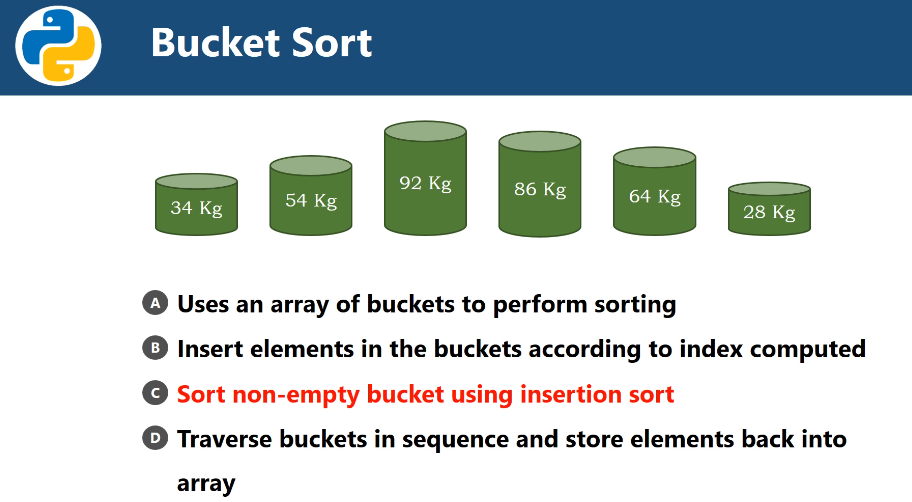

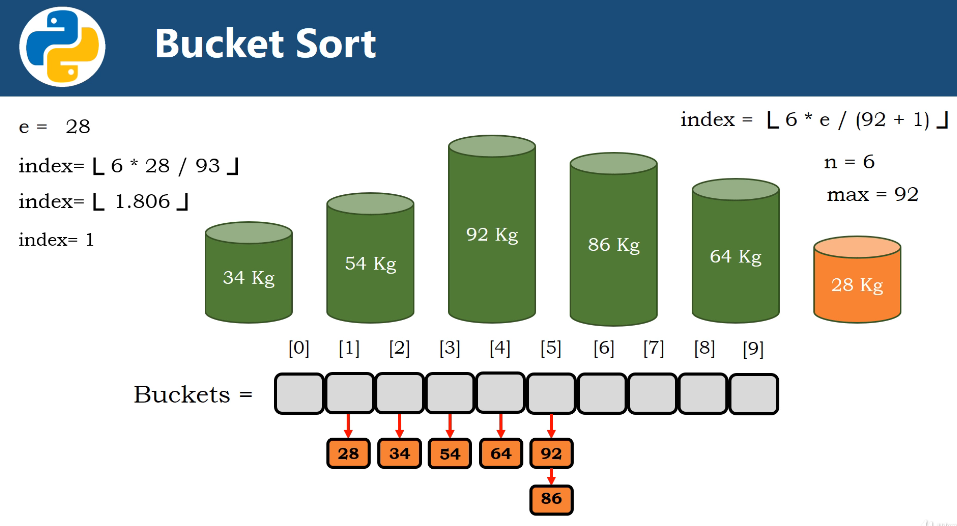

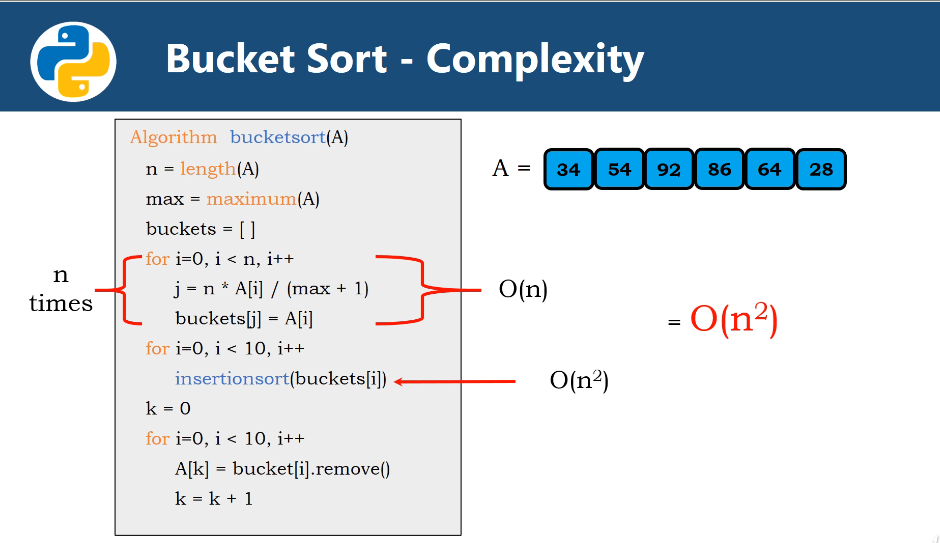

In [21]:
def insertionsort(A):
    n = len(A)
    for i in range(1, n):
        cval = A[i]
        j = i
        while j > 0 and cval < A[j - 1]:
            A[j] = A[j - 1]
            j -= 1
        A[j] = cval


def bucketsort(A, nbuckets):
    n = len(A)
    m = max(A)
    buckets = [[] for _ in range(nbuckets)]
    for i in A:
        j = (i * n) // (m + 1)
        buckets[j].append(i)
    for bucket in buckets:
        insertionsort(bucket)
    k = 0
    for b in buckets:
        while len(b):
            A[k] = b.pop(0)
            k += 1
            

In [22]:
A = np.random.randint(1, 21, 20)
print('Before bucket sort:')
print(A)
bucketsort(A, 20)
print('After bucket sort:')
print(A)

Before bucket sort:
[ 6  5  3  3  4  3 13 14  6  4  4  4 16  9 16  4  4  9 16 11]
After bucket sort:
[ 3  3  3  4  4  4  4  4  4  5  6  6  9  9 11 13 14 16 16 16]
